In [1]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('price_informations.csv')

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
160,1-Dec-13,697.0,1205.7,1239.9,576.0,362230.0,-0.42
161,8-Dec-13,908.9,697.0,1067.7,653.0,144170.0,0.30
162,15-Dec-13,640.5,908.9,927.9,454.9,293970.0,-0.30
163,22-Dec-13,762.0,640.5,836.8,615.0,93740.0,0.19


In [4]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [5]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
trainX.shape

(110, 1, 5)

In [11]:
model = Sequential()  
model.add(LSTM(1, input_shape=(1, 5),return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 1)              28        
_________________________________________________________________
dense (Dense)                (None, 1, 1)              2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(trainX, y_train, epochs=5000, batch_size=1, verbose=2)

Epoch 1/5000
110/110 - 0s - loss: 73.0776
Epoch 2/5000
110/110 - 0s - loss: 72.8662
Epoch 3/5000
110/110 - 0s - loss: 72.6606
Epoch 4/5000
110/110 - 0s - loss: 72.4459
Epoch 5/5000
110/110 - 0s - loss: 72.2334
Epoch 6/5000
110/110 - 0s - loss: 72.0393
Epoch 7/5000
110/110 - 0s - loss: 71.8588
Epoch 8/5000
110/110 - 0s - loss: 71.6870
Epoch 9/5000
110/110 - 0s - loss: 71.5249
Epoch 10/5000
110/110 - 0s - loss: 71.3748
Epoch 11/5000
110/110 - 0s - loss: 71.2296
Epoch 12/5000
110/110 - 0s - loss: 71.0950
Epoch 13/5000
110/110 - 0s - loss: 70.9644
Epoch 14/5000
110/110 - 0s - loss: 70.8352
Epoch 15/5000
110/110 - 0s - loss: 70.7173
Epoch 16/5000
110/110 - 0s - loss: 70.6101
Epoch 17/5000
110/110 - 0s - loss: 70.5070
Epoch 18/5000
110/110 - 0s - loss: 70.4091
Epoch 19/5000
110/110 - 0s - loss: 70.3183
Epoch 20/5000
110/110 - 0s - loss: 70.2373
Epoch 21/5000
110/110 - 0s - loss: 70.1604
Epoch 22/5000
110/110 - 0s - loss: 70.0861
Epoch 23/5000
110/110 - 0s - loss: 70.0154
Epoch 24/5000
110/11

Epoch 190/5000
110/110 - 0s - loss: 65.7053
Epoch 191/5000
110/110 - 0s - loss: 65.6641
Epoch 192/5000
110/110 - 0s - loss: 65.6326
Epoch 193/5000
110/110 - 0s - loss: 65.5945
Epoch 194/5000
110/110 - 0s - loss: 65.5529
Epoch 195/5000
110/110 - 0s - loss: 65.5176
Epoch 196/5000
110/110 - 0s - loss: 65.4743
Epoch 197/5000
110/110 - 0s - loss: 65.4408
Epoch 198/5000
110/110 - 0s - loss: 65.3983
Epoch 199/5000
110/110 - 0s - loss: 65.3578
Epoch 200/5000
110/110 - 0s - loss: 65.3227
Epoch 201/5000
110/110 - 0s - loss: 65.2817
Epoch 202/5000
110/110 - 0s - loss: 65.2458
Epoch 203/5000
110/110 - 0s - loss: 65.2043
Epoch 204/5000
110/110 - 0s - loss: 65.1681
Epoch 205/5000
110/110 - 0s - loss: 65.1247
Epoch 206/5000
110/110 - 0s - loss: 65.0906
Epoch 207/5000
110/110 - 0s - loss: 65.0486
Epoch 208/5000
110/110 - 0s - loss: 65.0111
Epoch 209/5000
110/110 - 0s - loss: 64.9718
Epoch 210/5000
110/110 - 0s - loss: 64.9327
Epoch 211/5000
110/110 - 0s - loss: 64.8913
Epoch 212/5000
110/110 - 0s - lo

Epoch 377/5000
110/110 - 0s - loss: 59.5067
Epoch 378/5000
110/110 - 0s - loss: 59.4950
Epoch 379/5000
110/110 - 0s - loss: 59.4810
Epoch 380/5000
110/110 - 0s - loss: 59.4603
Epoch 381/5000
110/110 - 0s - loss: 59.4469
Epoch 382/5000
110/110 - 0s - loss: 59.4278
Epoch 383/5000
110/110 - 0s - loss: 59.4124
Epoch 384/5000
110/110 - 0s - loss: 59.3928
Epoch 385/5000
110/110 - 0s - loss: 59.3781
Epoch 386/5000
110/110 - 0s - loss: 59.3548
Epoch 387/5000
110/110 - 0s - loss: 59.3415
Epoch 388/5000
110/110 - 0s - loss: 59.3242
Epoch 389/5000
110/110 - 0s - loss: 59.3027
Epoch 390/5000
110/110 - 0s - loss: 59.2815
Epoch 391/5000
110/110 - 0s - loss: 59.2661
Epoch 392/5000
110/110 - 0s - loss: 59.2466
Epoch 393/5000
110/110 - 0s - loss: 59.2327
Epoch 394/5000
110/110 - 0s - loss: 59.2203
Epoch 395/5000
110/110 - 0s - loss: 59.1956
Epoch 396/5000
110/110 - 0s - loss: 59.1805
Epoch 397/5000
110/110 - 0s - loss: 59.1619
Epoch 398/5000
110/110 - 0s - loss: 59.1407
Epoch 399/5000
110/110 - 0s - lo

Epoch 564/5000
110/110 - 0s - loss: 56.3353
Epoch 565/5000
110/110 - 0s - loss: 56.3103
Epoch 566/5000
110/110 - 0s - loss: 56.3031
Epoch 567/5000
110/110 - 0s - loss: 56.2869
Epoch 568/5000
110/110 - 0s - loss: 56.2713
Epoch 569/5000
110/110 - 0s - loss: 56.2527
Epoch 570/5000
110/110 - 0s - loss: 56.2397
Epoch 571/5000
110/110 - 0s - loss: 56.2273
Epoch 572/5000
110/110 - 0s - loss: 56.2142
Epoch 573/5000
110/110 - 0s - loss: 56.2003
Epoch 574/5000
110/110 - 0s - loss: 56.1847
Epoch 575/5000
110/110 - 0s - loss: 56.1637
Epoch 576/5000
110/110 - 0s - loss: 56.1500
Epoch 577/5000
110/110 - 0s - loss: 56.1424
Epoch 578/5000
110/110 - 0s - loss: 56.1188
Epoch 579/5000
110/110 - 0s - loss: 56.1092
Epoch 580/5000
110/110 - 0s - loss: 56.0933
Epoch 581/5000
110/110 - 0s - loss: 56.0775
Epoch 582/5000
110/110 - 0s - loss: 56.0615
Epoch 583/5000
110/110 - 0s - loss: 56.0485
Epoch 584/5000
110/110 - 0s - loss: 56.0349
Epoch 585/5000
110/110 - 0s - loss: 56.0179
Epoch 586/5000
110/110 - 0s - lo

Epoch 751/5000
110/110 - 0s - loss: 53.5458
Epoch 752/5000
110/110 - 0s - loss: 53.5258
Epoch 753/5000
110/110 - 0s - loss: 53.5294
Epoch 754/5000
110/110 - 0s - loss: 53.5005
Epoch 755/5000
110/110 - 0s - loss: 53.4978
Epoch 756/5000
110/110 - 0s - loss: 53.4799
Epoch 757/5000
110/110 - 0s - loss: 53.4664
Epoch 758/5000
110/110 - 0s - loss: 53.4500
Epoch 759/5000
110/110 - 0s - loss: 53.4455
Epoch 760/5000
110/110 - 0s - loss: 53.4309
Epoch 761/5000
110/110 - 0s - loss: 53.4128
Epoch 762/5000
110/110 - 0s - loss: 53.4087
Epoch 763/5000
110/110 - 0s - loss: 53.3924
Epoch 764/5000
110/110 - 0s - loss: 53.3744
Epoch 765/5000
110/110 - 0s - loss: 53.3619
Epoch 766/5000
110/110 - 0s - loss: 53.3365
Epoch 767/5000
110/110 - 0s - loss: 53.3270
Epoch 768/5000
110/110 - 0s - loss: 53.3119
Epoch 769/5000
110/110 - 0s - loss: 53.3196
Epoch 770/5000
110/110 - 0s - loss: 53.2953
Epoch 771/5000
110/110 - 0s - loss: 53.2732
Epoch 772/5000
110/110 - 0s - loss: 53.2604
Epoch 773/5000
110/110 - 0s - lo

Epoch 938/5000
110/110 - 0s - loss: 51.1406
Epoch 939/5000
110/110 - 0s - loss: 51.1219
Epoch 940/5000
110/110 - 0s - loss: 51.1149
Epoch 941/5000
110/110 - 0s - loss: 51.1058
Epoch 942/5000
110/110 - 0s - loss: 51.1040
Epoch 943/5000
110/110 - 0s - loss: 51.0805
Epoch 944/5000
110/110 - 0s - loss: 51.0675
Epoch 945/5000
110/110 - 0s - loss: 51.0512
Epoch 946/5000
110/110 - 0s - loss: 51.0451
Epoch 947/5000
110/110 - 0s - loss: 51.0196
Epoch 948/5000
110/110 - 0s - loss: 51.0168
Epoch 949/5000
110/110 - 0s - loss: 51.0080
Epoch 950/5000
110/110 - 0s - loss: 50.9938
Epoch 951/5000
110/110 - 0s - loss: 50.9835
Epoch 952/5000
110/110 - 0s - loss: 50.9650
Epoch 953/5000
110/110 - 0s - loss: 50.9575
Epoch 954/5000
110/110 - 0s - loss: 50.9363
Epoch 955/5000
110/110 - 0s - loss: 50.9314
Epoch 956/5000
110/110 - 0s - loss: 50.9173
Epoch 957/5000
110/110 - 0s - loss: 50.9054
Epoch 958/5000
110/110 - 0s - loss: 50.8890
Epoch 959/5000
110/110 - 0s - loss: 50.8877
Epoch 960/5000
110/110 - 0s - lo

Epoch 1122/5000
110/110 - 0s - loss: 48.9262
Epoch 1123/5000
110/110 - 0s - loss: 48.9424
Epoch 1124/5000
110/110 - 0s - loss: 48.9215
Epoch 1125/5000
110/110 - 0s - loss: 48.9036
Epoch 1126/5000
110/110 - 0s - loss: 48.9052
Epoch 1127/5000
110/110 - 0s - loss: 48.8789
Epoch 1128/5000
110/110 - 0s - loss: 48.8756
Epoch 1129/5000
110/110 - 0s - loss: 48.8586
Epoch 1130/5000
110/110 - 0s - loss: 48.8384
Epoch 1131/5000
110/110 - 0s - loss: 48.8308
Epoch 1132/5000
110/110 - 0s - loss: 48.8449
Epoch 1133/5000
110/110 - 0s - loss: 48.8152
Epoch 1134/5000
110/110 - 0s - loss: 48.8131
Epoch 1135/5000
110/110 - 0s - loss: 48.8004
Epoch 1136/5000
110/110 - 0s - loss: 48.7933
Epoch 1137/5000
110/110 - 0s - loss: 48.7754
Epoch 1138/5000
110/110 - 0s - loss: 48.7628
Epoch 1139/5000
110/110 - 0s - loss: 48.7575
Epoch 1140/5000
110/110 - 0s - loss: 48.7443
Epoch 1141/5000
110/110 - 0s - loss: 48.7325
Epoch 1142/5000
110/110 - 0s - loss: 48.7287
Epoch 1143/5000
110/110 - 0s - loss: 48.7291
Epoch 1144

110/110 - 0s - loss: 47.1207
Epoch 1305/5000
110/110 - 0s - loss: 47.1129
Epoch 1306/5000
110/110 - 0s - loss: 47.0975
Epoch 1307/5000
110/110 - 0s - loss: 47.0970
Epoch 1308/5000
110/110 - 0s - loss: 47.0835
Epoch 1309/5000
110/110 - 0s - loss: 47.0853
Epoch 1310/5000
110/110 - 0s - loss: 47.0831
Epoch 1311/5000
110/110 - 0s - loss: 47.0591
Epoch 1312/5000
110/110 - 0s - loss: 47.0525
Epoch 1313/5000
110/110 - 0s - loss: 47.0397
Epoch 1314/5000
110/110 - 0s - loss: 47.0357
Epoch 1315/5000
110/110 - 0s - loss: 47.0281
Epoch 1316/5000
110/110 - 0s - loss: 47.0109
Epoch 1317/5000
110/110 - 0s - loss: 46.9908
Epoch 1318/5000
110/110 - 0s - loss: 46.9863
Epoch 1319/5000
110/110 - 0s - loss: 46.9629
Epoch 1320/5000
110/110 - 0s - loss: 46.9713
Epoch 1321/5000
110/110 - 0s - loss: 46.9551
Epoch 1322/5000
110/110 - 0s - loss: 46.9486
Epoch 1323/5000
110/110 - 0s - loss: 46.9426
Epoch 1324/5000
110/110 - 0s - loss: 46.9202
Epoch 1325/5000
110/110 - 0s - loss: 46.9261
Epoch 1326/5000
110/110 - 

Epoch 1487/5000
110/110 - 0s - loss: 45.3184
Epoch 1488/5000
110/110 - 0s - loss: 45.2959
Epoch 1489/5000
110/110 - 0s - loss: 45.3007
Epoch 1490/5000
110/110 - 0s - loss: 45.2841
Epoch 1491/5000
110/110 - 0s - loss: 45.2771
Epoch 1492/5000
110/110 - 0s - loss: 45.2624
Epoch 1493/5000
110/110 - 0s - loss: 45.2687
Epoch 1494/5000
110/110 - 0s - loss: 45.2397
Epoch 1495/5000
110/110 - 0s - loss: 45.2548
Epoch 1496/5000
110/110 - 0s - loss: 45.2335
Epoch 1497/5000
110/110 - 0s - loss: 45.2147
Epoch 1498/5000
110/110 - 0s - loss: 45.2112
Epoch 1499/5000
110/110 - 0s - loss: 45.2001
Epoch 1500/5000
110/110 - 0s - loss: 45.1816
Epoch 1501/5000
110/110 - 0s - loss: 45.1833
Epoch 1502/5000
110/110 - 0s - loss: 45.1603
Epoch 1503/5000
110/110 - 0s - loss: 45.1570
Epoch 1504/5000
110/110 - 0s - loss: 45.1446
Epoch 1505/5000
110/110 - 0s - loss: 45.1526
Epoch 1506/5000
110/110 - 0s - loss: 45.1332
Epoch 1507/5000
110/110 - 0s - loss: 45.1200
Epoch 1508/5000
110/110 - 0s - loss: 45.1048
Epoch 1509

110/110 - 0s - loss: 43.7479
Epoch 1670/5000
110/110 - 0s - loss: 43.7406
Epoch 1671/5000
110/110 - 0s - loss: 43.7262
Epoch 1672/5000
110/110 - 0s - loss: 43.7137
Epoch 1673/5000
110/110 - 0s - loss: 43.7106
Epoch 1674/5000
110/110 - 0s - loss: 43.6918
Epoch 1675/5000
110/110 - 0s - loss: 43.7042
Epoch 1676/5000
110/110 - 0s - loss: 43.6858
Epoch 1677/5000
110/110 - 0s - loss: 43.6713
Epoch 1678/5000
110/110 - 0s - loss: 43.6865
Epoch 1679/5000
110/110 - 0s - loss: 43.6663
Epoch 1680/5000
110/110 - 0s - loss: 43.6550
Epoch 1681/5000
110/110 - 0s - loss: 43.6498
Epoch 1682/5000
110/110 - 0s - loss: 43.6473
Epoch 1683/5000
110/110 - 0s - loss: 43.6574
Epoch 1684/5000
110/110 - 0s - loss: 43.6362
Epoch 1685/5000
110/110 - 0s - loss: 43.6413
Epoch 1686/5000
110/110 - 0s - loss: 43.6202
Epoch 1687/5000
110/110 - 0s - loss: 43.6226
Epoch 1688/5000
110/110 - 0s - loss: 43.6224
Epoch 1689/5000
110/110 - 0s - loss: 43.6021
Epoch 1690/5000
110/110 - 0s - loss: 43.5856
Epoch 1691/5000
110/110 - 

Epoch 1852/5000
110/110 - 0s - loss: 42.4829
Epoch 1853/5000
110/110 - 0s - loss: 42.4682
Epoch 1854/5000
110/110 - 0s - loss: 42.4689
Epoch 1855/5000
110/110 - 0s - loss: 42.4772
Epoch 1856/5000
110/110 - 0s - loss: 42.4520
Epoch 1857/5000
110/110 - 0s - loss: 42.4652
Epoch 1858/5000
110/110 - 0s - loss: 42.4381
Epoch 1859/5000
110/110 - 0s - loss: 42.4378
Epoch 1860/5000
110/110 - 0s - loss: 42.4439
Epoch 1861/5000
110/110 - 0s - loss: 42.4294
Epoch 1862/5000
110/110 - 0s - loss: 42.4449
Epoch 1863/5000
110/110 - 0s - loss: 42.4200
Epoch 1864/5000
110/110 - 0s - loss: 42.4043
Epoch 1865/5000
110/110 - 0s - loss: 42.4038
Epoch 1866/5000
110/110 - 0s - loss: 42.4201
Epoch 1867/5000
110/110 - 0s - loss: 42.3901
Epoch 1868/5000
110/110 - 0s - loss: 42.3867
Epoch 1869/5000
110/110 - 0s - loss: 42.3778
Epoch 1870/5000
110/110 - 0s - loss: 42.3730
Epoch 1871/5000
110/110 - 0s - loss: 42.3546
Epoch 1872/5000
110/110 - 0s - loss: 42.3585
Epoch 1873/5000
110/110 - 0s - loss: 42.3422
Epoch 1874

110/110 - 0s - loss: 41.5542
Epoch 2035/5000
110/110 - 0s - loss: 41.5582
Epoch 2036/5000
110/110 - 0s - loss: 41.5642
Epoch 2037/5000
110/110 - 0s - loss: 41.5327
Epoch 2038/5000
110/110 - 0s - loss: 41.5276
Epoch 2039/5000
110/110 - 0s - loss: 41.5147
Epoch 2040/5000
110/110 - 0s - loss: 41.5252
Epoch 2041/5000
110/110 - 0s - loss: 41.5165
Epoch 2042/5000
110/110 - 0s - loss: 41.5271
Epoch 2043/5000
110/110 - 0s - loss: 41.5166
Epoch 2044/5000
110/110 - 0s - loss: 41.5101
Epoch 2045/5000
110/110 - 0s - loss: 41.5048
Epoch 2046/5000
110/110 - 0s - loss: 41.4963
Epoch 2047/5000
110/110 - 0s - loss: 41.4846
Epoch 2048/5000
110/110 - 0s - loss: 41.5009
Epoch 2049/5000
110/110 - 0s - loss: 41.4935
Epoch 2050/5000
110/110 - 0s - loss: 41.4736
Epoch 2051/5000
110/110 - 0s - loss: 41.4873
Epoch 2052/5000
110/110 - 0s - loss: 41.4813
Epoch 2053/5000
110/110 - 0s - loss: 41.4662
Epoch 2054/5000
110/110 - 0s - loss: 41.4762
Epoch 2055/5000
110/110 - 0s - loss: 41.4597
Epoch 2056/5000
110/110 - 

Epoch 2217/5000
110/110 - 0s - loss: 40.8754
Epoch 2218/5000
110/110 - 0s - loss: 40.8547
Epoch 2219/5000
110/110 - 0s - loss: 40.8535
Epoch 2220/5000
110/110 - 0s - loss: 40.8792
Epoch 2221/5000
110/110 - 0s - loss: 40.8550
Epoch 2222/5000
110/110 - 0s - loss: 40.8332
Epoch 2223/5000
110/110 - 0s - loss: 40.8522
Epoch 2224/5000
110/110 - 0s - loss: 40.8367
Epoch 2225/5000
110/110 - 0s - loss: 40.8394
Epoch 2226/5000
110/110 - 0s - loss: 40.8409
Epoch 2227/5000
110/110 - 0s - loss: 40.8417
Epoch 2228/5000
110/110 - 0s - loss: 40.8337
Epoch 2229/5000
110/110 - 0s - loss: 40.8303
Epoch 2230/5000
110/110 - 0s - loss: 40.8217
Epoch 2231/5000
110/110 - 0s - loss: 40.8298
Epoch 2232/5000
110/110 - 0s - loss: 40.8070
Epoch 2233/5000
110/110 - 0s - loss: 40.8113
Epoch 2234/5000
110/110 - 0s - loss: 40.8149
Epoch 2235/5000
110/110 - 0s - loss: 40.8122
Epoch 2236/5000
110/110 - 0s - loss: 40.8017
Epoch 2237/5000
110/110 - 0s - loss: 40.8073
Epoch 2238/5000
110/110 - 0s - loss: 40.8127
Epoch 2239

110/110 - 0s - loss: 40.3263
Epoch 2400/5000
110/110 - 0s - loss: 40.3076
Epoch 2401/5000
110/110 - 0s - loss: 40.3070
Epoch 2402/5000
110/110 - 0s - loss: 40.3163
Epoch 2403/5000
110/110 - 0s - loss: 40.3038
Epoch 2404/5000
110/110 - 0s - loss: 40.2886
Epoch 2405/5000
110/110 - 0s - loss: 40.3228
Epoch 2406/5000
110/110 - 0s - loss: 40.3031
Epoch 2407/5000
110/110 - 0s - loss: 40.2992
Epoch 2408/5000
110/110 - 0s - loss: 40.2903
Epoch 2409/5000
110/110 - 0s - loss: 40.3294
Epoch 2410/5000
110/110 - 0s - loss: 40.2810
Epoch 2411/5000
110/110 - 0s - loss: 40.2857
Epoch 2412/5000
110/110 - 0s - loss: 40.2860
Epoch 2413/5000
110/110 - 0s - loss: 40.3094
Epoch 2414/5000
110/110 - 0s - loss: 40.2835
Epoch 2415/5000
110/110 - 0s - loss: 40.2812
Epoch 2416/5000
110/110 - 0s - loss: 40.2907
Epoch 2417/5000
110/110 - 0s - loss: 40.2742
Epoch 2418/5000
110/110 - 0s - loss: 40.2743
Epoch 2419/5000
110/110 - 0s - loss: 40.2811
Epoch 2420/5000
110/110 - 0s - loss: 40.2640
Epoch 2421/5000
110/110 - 

Epoch 2582/5000
110/110 - 0s - loss: 39.9061
Epoch 2583/5000
110/110 - 0s - loss: 39.9019
Epoch 2584/5000
110/110 - 0s - loss: 39.8882
Epoch 2585/5000
110/110 - 0s - loss: 39.9310
Epoch 2586/5000
110/110 - 0s - loss: 39.8971
Epoch 2587/5000
110/110 - 0s - loss: 39.8979
Epoch 2588/5000
110/110 - 0s - loss: 39.8937
Epoch 2589/5000
110/110 - 0s - loss: 39.8781
Epoch 2590/5000
110/110 - 0s - loss: 39.8946
Epoch 2591/5000
110/110 - 0s - loss: 39.8833
Epoch 2592/5000
110/110 - 0s - loss: 39.8659
Epoch 2593/5000
110/110 - 0s - loss: 39.8916
Epoch 2594/5000
110/110 - 0s - loss: 39.8810
Epoch 2595/5000
110/110 - 0s - loss: 39.8887
Epoch 2596/5000
110/110 - 0s - loss: 39.8708
Epoch 2597/5000
110/110 - 0s - loss: 39.8979
Epoch 2598/5000
110/110 - 0s - loss: 39.8849
Epoch 2599/5000
110/110 - 0s - loss: 39.8597
Epoch 2600/5000
110/110 - 0s - loss: 39.8826
Epoch 2601/5000
110/110 - 0s - loss: 39.8662
Epoch 2602/5000
110/110 - 0s - loss: 39.8709
Epoch 2603/5000
110/110 - 0s - loss: 39.8541
Epoch 2604

110/110 - 0s - loss: 39.5530
Epoch 2765/5000
110/110 - 0s - loss: 39.5507
Epoch 2766/5000
110/110 - 0s - loss: 39.5476
Epoch 2767/5000
110/110 - 0s - loss: 39.5560
Epoch 2768/5000
110/110 - 0s - loss: 39.5490
Epoch 2769/5000
110/110 - 0s - loss: 39.5228
Epoch 2770/5000
110/110 - 0s - loss: 39.5431
Epoch 2771/5000
110/110 - 0s - loss: 39.5356
Epoch 2772/5000
110/110 - 0s - loss: 39.5203
Epoch 2773/5000
110/110 - 0s - loss: 39.5569
Epoch 2774/5000
110/110 - 0s - loss: 39.5488
Epoch 2775/5000
110/110 - 0s - loss: 39.5200
Epoch 2776/5000
110/110 - 0s - loss: 39.5130
Epoch 2777/5000
110/110 - 0s - loss: 39.5378
Epoch 2778/5000
110/110 - 0s - loss: 39.5283
Epoch 2779/5000
110/110 - 0s - loss: 39.5332
Epoch 2780/5000
110/110 - 0s - loss: 39.5339
Epoch 2781/5000
110/110 - 0s - loss: 39.5423
Epoch 2782/5000
110/110 - 0s - loss: 39.5448
Epoch 2783/5000
110/110 - 0s - loss: 39.5252
Epoch 2784/5000
110/110 - 0s - loss: 39.5137
Epoch 2785/5000
110/110 - 0s - loss: 39.5287
Epoch 2786/5000
110/110 - 

Epoch 2947/5000
110/110 - 0s - loss: 39.2335
Epoch 2948/5000
110/110 - 0s - loss: 39.2337
Epoch 2949/5000
110/110 - 0s - loss: 39.2180
Epoch 2950/5000
110/110 - 0s - loss: 39.2249
Epoch 2951/5000
110/110 - 0s - loss: 39.2289
Epoch 2952/5000
110/110 - 0s - loss: 39.2382
Epoch 2953/5000
110/110 - 0s - loss: 39.2325
Epoch 2954/5000
110/110 - 0s - loss: 39.2120
Epoch 2955/5000
110/110 - 0s - loss: 39.2456
Epoch 2956/5000
110/110 - 0s - loss: 39.1921
Epoch 2957/5000
110/110 - 0s - loss: 39.2304
Epoch 2958/5000
110/110 - 0s - loss: 39.2139
Epoch 2959/5000
110/110 - 0s - loss: 39.1967
Epoch 2960/5000
110/110 - 0s - loss: 39.2065
Epoch 2961/5000
110/110 - 0s - loss: 39.2189
Epoch 2962/5000
110/110 - 0s - loss: 39.2056
Epoch 2963/5000
110/110 - 0s - loss: 39.1831
Epoch 2964/5000
110/110 - 0s - loss: 39.2144
Epoch 2965/5000
110/110 - 0s - loss: 39.1972
Epoch 2966/5000
110/110 - 0s - loss: 39.2106
Epoch 2967/5000
110/110 - 0s - loss: 39.1994
Epoch 2968/5000
110/110 - 0s - loss: 39.1809
Epoch 2969

110/110 - 0s - loss: 38.9084
Epoch 3130/5000
110/110 - 0s - loss: 38.9308
Epoch 3131/5000
110/110 - 0s - loss: 38.8994
Epoch 3132/5000
110/110 - 0s - loss: 38.9002
Epoch 3133/5000
110/110 - 0s - loss: 38.9142
Epoch 3134/5000
110/110 - 0s - loss: 38.9031
Epoch 3135/5000
110/110 - 0s - loss: 38.8999
Epoch 3136/5000
110/110 - 0s - loss: 38.8999
Epoch 3137/5000
110/110 - 0s - loss: 38.9076
Epoch 3138/5000
110/110 - 0s - loss: 38.8962
Epoch 3139/5000
110/110 - 0s - loss: 38.8887
Epoch 3140/5000
110/110 - 0s - loss: 38.8999
Epoch 3141/5000
110/110 - 0s - loss: 38.9026
Epoch 3142/5000
110/110 - 0s - loss: 38.8974
Epoch 3143/5000
110/110 - 0s - loss: 38.8798
Epoch 3144/5000
110/110 - 0s - loss: 38.8950
Epoch 3145/5000
110/110 - 0s - loss: 38.9159
Epoch 3146/5000
110/110 - 0s - loss: 38.8924
Epoch 3147/5000
110/110 - 0s - loss: 38.8881
Epoch 3148/5000
110/110 - 0s - loss: 38.8792
Epoch 3149/5000
110/110 - 0s - loss: 38.8792
Epoch 3150/5000
110/110 - 0s - loss: 38.8694
Epoch 3151/5000
110/110 - 

Epoch 3312/5000
110/110 - 0s - loss: 38.5912
Epoch 3313/5000
110/110 - 0s - loss: 38.5914
Epoch 3314/5000
110/110 - 0s - loss: 38.5935
Epoch 3315/5000
110/110 - 0s - loss: 38.5881
Epoch 3316/5000
110/110 - 0s - loss: 38.5983
Epoch 3317/5000
110/110 - 0s - loss: 38.5687
Epoch 3318/5000
110/110 - 0s - loss: 38.5749
Epoch 3319/5000
110/110 - 0s - loss: 38.6189
Epoch 3320/5000
110/110 - 0s - loss: 38.5850
Epoch 3321/5000
110/110 - 0s - loss: 38.5573
Epoch 3322/5000
110/110 - 0s - loss: 38.5686
Epoch 3323/5000
110/110 - 0s - loss: 38.5800
Epoch 3324/5000
110/110 - 0s - loss: 38.5906
Epoch 3325/5000
110/110 - 0s - loss: 38.5806
Epoch 3326/5000
110/110 - 0s - loss: 38.5753
Epoch 3327/5000
110/110 - 0s - loss: 38.5707
Epoch 3328/5000
110/110 - 0s - loss: 38.5745
Epoch 3329/5000
110/110 - 0s - loss: 38.5742
Epoch 3330/5000
110/110 - 0s - loss: 38.5948
Epoch 3331/5000
110/110 - 0s - loss: 38.5613
Epoch 3332/5000
110/110 - 0s - loss: 38.5488
Epoch 3333/5000
110/110 - 0s - loss: 38.5625
Epoch 3334

110/110 - 0s - loss: 38.4035
Epoch 3495/5000
110/110 - 0s - loss: 38.3848
Epoch 3496/5000
110/110 - 0s - loss: 38.3877
Epoch 3497/5000
110/110 - 0s - loss: 38.3840
Epoch 3498/5000
110/110 - 0s - loss: 38.3576
Epoch 3499/5000
110/110 - 0s - loss: 38.3914
Epoch 3500/5000
110/110 - 0s - loss: 38.3696
Epoch 3501/5000
110/110 - 0s - loss: 38.3725
Epoch 3502/5000
110/110 - 0s - loss: 38.3738
Epoch 3503/5000
110/110 - 0s - loss: 38.3823
Epoch 3504/5000
110/110 - 0s - loss: 38.3708
Epoch 3505/5000
110/110 - 0s - loss: 38.3665
Epoch 3506/5000
110/110 - 0s - loss: 38.3588
Epoch 3507/5000
110/110 - 0s - loss: 38.3770
Epoch 3508/5000
110/110 - 0s - loss: 38.4023
Epoch 3509/5000
110/110 - 0s - loss: 38.3466
Epoch 3510/5000
110/110 - 0s - loss: 38.3774
Epoch 3511/5000
110/110 - 0s - loss: 38.3569
Epoch 3512/5000
110/110 - 0s - loss: 38.3483
Epoch 3513/5000
110/110 - 0s - loss: 38.3499
Epoch 3514/5000
110/110 - 0s - loss: 38.3544
Epoch 3515/5000
110/110 - 0s - loss: 38.3530
Epoch 3516/5000
110/110 - 

Epoch 3677/5000
110/110 - 0s - loss: 38.1750
Epoch 3678/5000
110/110 - 0s - loss: 38.1760
Epoch 3679/5000
110/110 - 0s - loss: 38.2029
Epoch 3680/5000
110/110 - 0s - loss: 38.1706
Epoch 3681/5000
110/110 - 0s - loss: 38.1655
Epoch 3682/5000
110/110 - 0s - loss: 38.1573
Epoch 3683/5000
110/110 - 0s - loss: 38.1819
Epoch 3684/5000
110/110 - 0s - loss: 38.1669
Epoch 3685/5000
110/110 - 0s - loss: 38.2089
Epoch 3686/5000
110/110 - 0s - loss: 38.1660
Epoch 3687/5000
110/110 - 0s - loss: 38.2169
Epoch 3688/5000
110/110 - 0s - loss: 38.1880
Epoch 3689/5000
110/110 - 0s - loss: 38.1668
Epoch 3690/5000
110/110 - 0s - loss: 38.1752
Epoch 3691/5000
110/110 - 0s - loss: 38.1809
Epoch 3692/5000
110/110 - 0s - loss: 38.1759
Epoch 3693/5000
110/110 - 0s - loss: 38.1510
Epoch 3694/5000
110/110 - 0s - loss: 38.1960
Epoch 3695/5000
110/110 - 0s - loss: 38.1777
Epoch 3696/5000
110/110 - 0s - loss: 38.1889
Epoch 3697/5000
110/110 - 0s - loss: 38.1616
Epoch 3698/5000
110/110 - 0s - loss: 38.1560
Epoch 3699

110/110 - 0s - loss: 38.0309
Epoch 3860/5000
110/110 - 0s - loss: 38.0093
Epoch 3861/5000
110/110 - 0s - loss: 37.9838
Epoch 3862/5000
110/110 - 0s - loss: 37.9860
Epoch 3863/5000
110/110 - 0s - loss: 37.9500
Epoch 3864/5000
110/110 - 0s - loss: 37.9973
Epoch 3865/5000
110/110 - 0s - loss: 37.9861
Epoch 3866/5000
110/110 - 0s - loss: 37.9899
Epoch 3867/5000
110/110 - 0s - loss: 37.9824
Epoch 3868/5000
110/110 - 0s - loss: 37.9922
Epoch 3869/5000
110/110 - 0s - loss: 37.9738
Epoch 3870/5000
110/110 - 0s - loss: 37.9771
Epoch 3871/5000
110/110 - 0s - loss: 37.9685
Epoch 3872/5000
110/110 - 0s - loss: 38.0242
Epoch 3873/5000
110/110 - 0s - loss: 37.9766
Epoch 3874/5000
110/110 - 0s - loss: 37.9485
Epoch 3875/5000
110/110 - 0s - loss: 37.9570
Epoch 3876/5000
110/110 - 0s - loss: 37.9784
Epoch 3877/5000
110/110 - 0s - loss: 37.9892
Epoch 3878/5000
110/110 - 0s - loss: 37.9805
Epoch 3879/5000
110/110 - 0s - loss: 37.9827
Epoch 3880/5000
110/110 - 0s - loss: 37.9707
Epoch 3881/5000
110/110 - 

Epoch 4042/5000
110/110 - 0s - loss: 37.8072
Epoch 4043/5000
110/110 - 0s - loss: 37.8133
Epoch 4044/5000
110/110 - 0s - loss: 37.8025
Epoch 4045/5000
110/110 - 0s - loss: 37.8105
Epoch 4046/5000
110/110 - 0s - loss: 37.7930
Epoch 4047/5000
110/110 - 0s - loss: 37.8088
Epoch 4048/5000
110/110 - 0s - loss: 37.7942
Epoch 4049/5000
110/110 - 0s - loss: 37.7910
Epoch 4050/5000
110/110 - 0s - loss: 37.7536
Epoch 4051/5000
110/110 - 0s - loss: 37.8110
Epoch 4052/5000
110/110 - 0s - loss: 37.7872
Epoch 4053/5000
110/110 - 0s - loss: 37.7939
Epoch 4054/5000
110/110 - 0s - loss: 37.8081
Epoch 4055/5000
110/110 - 0s - loss: 37.7793
Epoch 4056/5000
110/110 - 0s - loss: 37.7963
Epoch 4057/5000
110/110 - 0s - loss: 37.8351
Epoch 4058/5000
110/110 - 0s - loss: 37.8024
Epoch 4059/5000
110/110 - 0s - loss: 37.7999
Epoch 4060/5000
110/110 - 0s - loss: 37.7791
Epoch 4061/5000
110/110 - 0s - loss: 37.7939
Epoch 4062/5000
110/110 - 0s - loss: 37.7819
Epoch 4063/5000
110/110 - 0s - loss: 37.7967
Epoch 4064

110/110 - 0s - loss: 37.6645
Epoch 4225/5000
110/110 - 0s - loss: 37.6248
Epoch 4226/5000
110/110 - 0s - loss: 37.5954
Epoch 4227/5000
110/110 - 0s - loss: 37.6119
Epoch 4228/5000
110/110 - 0s - loss: 37.6419
Epoch 4229/5000
110/110 - 0s - loss: 37.5911
Epoch 4230/5000
110/110 - 0s - loss: 37.6814
Epoch 4231/5000
110/110 - 0s - loss: 37.6170
Epoch 4232/5000
110/110 - 0s - loss: 37.6095
Epoch 4233/5000
110/110 - 0s - loss: 37.6131
Epoch 4234/5000
110/110 - 0s - loss: 37.6056
Epoch 4235/5000
110/110 - 0s - loss: 37.6188
Epoch 4236/5000
110/110 - 0s - loss: 37.6283
Epoch 4237/5000
110/110 - 0s - loss: 37.6148
Epoch 4238/5000
110/110 - 0s - loss: 37.6044
Epoch 4239/5000
110/110 - 0s - loss: 37.6160
Epoch 4240/5000
110/110 - 0s - loss: 37.6352
Epoch 4241/5000
110/110 - 0s - loss: 37.6034
Epoch 4242/5000
110/110 - 0s - loss: 37.6241
Epoch 4243/5000
110/110 - 0s - loss: 37.6153
Epoch 4244/5000
110/110 - 0s - loss: 37.6156
Epoch 4245/5000
110/110 - 0s - loss: 37.5965
Epoch 4246/5000
110/110 - 

Epoch 4407/5000
110/110 - 0s - loss: 37.4696
Epoch 4408/5000
110/110 - 0s - loss: 37.4530
Epoch 4409/5000
110/110 - 0s - loss: 37.4669
Epoch 4410/5000
110/110 - 0s - loss: 37.4668
Epoch 4411/5000
110/110 - 0s - loss: 37.4511
Epoch 4412/5000
110/110 - 0s - loss: 37.4481
Epoch 4413/5000
110/110 - 0s - loss: 37.4426
Epoch 4414/5000
110/110 - 0s - loss: 37.4592
Epoch 4415/5000
110/110 - 0s - loss: 37.4716
Epoch 4416/5000
110/110 - 0s - loss: 37.4594
Epoch 4417/5000
110/110 - 0s - loss: 37.4458
Epoch 4418/5000
110/110 - 0s - loss: 37.4808
Epoch 4419/5000
110/110 - 0s - loss: 37.4320
Epoch 4420/5000
110/110 - 0s - loss: 37.4574
Epoch 4421/5000
110/110 - 0s - loss: 37.4643
Epoch 4422/5000
110/110 - 0s - loss: 37.4585
Epoch 4423/5000
110/110 - 0s - loss: 37.4620
Epoch 4424/5000
110/110 - 0s - loss: 37.4348
Epoch 4425/5000
110/110 - 0s - loss: 37.4680
Epoch 4426/5000
110/110 - 0s - loss: 37.4394
Epoch 4427/5000
110/110 - 0s - loss: 37.4822
Epoch 4428/5000
110/110 - 0s - loss: 37.4325
Epoch 4429

110/110 - 0s - loss: 37.3026
Epoch 4590/5000
110/110 - 0s - loss: 37.3043
Epoch 4591/5000
110/110 - 0s - loss: 37.2745
Epoch 4592/5000
110/110 - 0s - loss: 37.2913
Epoch 4593/5000
110/110 - 0s - loss: 37.3020
Epoch 4594/5000
110/110 - 0s - loss: 37.3310
Epoch 4595/5000
110/110 - 0s - loss: 37.2985
Epoch 4596/5000
110/110 - 0s - loss: 37.2738
Epoch 4597/5000
110/110 - 0s - loss: 37.3116
Epoch 4598/5000
110/110 - 0s - loss: 37.3148
Epoch 4599/5000
110/110 - 0s - loss: 37.2806
Epoch 4600/5000
110/110 - 0s - loss: 37.2894
Epoch 4601/5000
110/110 - 0s - loss: 37.2854
Epoch 4602/5000
110/110 - 0s - loss: 37.2847
Epoch 4603/5000
110/110 - 0s - loss: 37.2809
Epoch 4604/5000
110/110 - 0s - loss: 37.2887
Epoch 4605/5000
110/110 - 0s - loss: 37.2855
Epoch 4606/5000
110/110 - 0s - loss: 37.2768
Epoch 4607/5000
110/110 - 0s - loss: 37.2844
Epoch 4608/5000
110/110 - 0s - loss: 37.2820
Epoch 4609/5000
110/110 - 0s - loss: 37.3071
Epoch 4610/5000
110/110 - 0s - loss: 37.2799
Epoch 4611/5000
110/110 - 

Epoch 4772/5000
110/110 - 0s - loss: 37.1348
Epoch 4773/5000
110/110 - 0s - loss: 37.1424
Epoch 4774/5000
110/110 - 0s - loss: 37.1432
Epoch 4775/5000
110/110 - 0s - loss: 37.1276
Epoch 4776/5000
110/110 - 0s - loss: 37.1705
Epoch 4777/5000
110/110 - 0s - loss: 37.1277
Epoch 4778/5000
110/110 - 0s - loss: 37.1466
Epoch 4779/5000
110/110 - 0s - loss: 37.1356
Epoch 4780/5000
110/110 - 0s - loss: 37.1335
Epoch 4781/5000
110/110 - 0s - loss: 37.1296
Epoch 4782/5000
110/110 - 0s - loss: 37.1325
Epoch 4783/5000
110/110 - 0s - loss: 37.1236
Epoch 4784/5000
110/110 - 0s - loss: 37.1241
Epoch 4785/5000
110/110 - 0s - loss: 37.1182
Epoch 4786/5000
110/110 - 0s - loss: 37.1379
Epoch 4787/5000
110/110 - 0s - loss: 37.1309
Epoch 4788/5000
110/110 - 0s - loss: 37.1224
Epoch 4789/5000
110/110 - 0s - loss: 37.1398
Epoch 4790/5000
110/110 - 0s - loss: 37.1121
Epoch 4791/5000
110/110 - 0s - loss: 37.1186
Epoch 4792/5000
110/110 - 0s - loss: 37.1057
Epoch 4793/5000
110/110 - 0s - loss: 37.1498
Epoch 4794

110/110 - 0s - loss: 37.0043
Epoch 4955/5000
110/110 - 0s - loss: 36.9705
Epoch 4956/5000
110/110 - 0s - loss: 36.9836
Epoch 4957/5000
110/110 - 0s - loss: 36.9692
Epoch 4958/5000
110/110 - 0s - loss: 37.0066
Epoch 4959/5000
110/110 - 0s - loss: 36.9935
Epoch 4960/5000
110/110 - 0s - loss: 36.9898
Epoch 4961/5000
110/110 - 0s - loss: 36.9902
Epoch 4962/5000
110/110 - 0s - loss: 36.9987
Epoch 4963/5000
110/110 - 0s - loss: 36.9641
Epoch 4964/5000
110/110 - 0s - loss: 36.9837
Epoch 4965/5000
110/110 - 0s - loss: 36.9606
Epoch 4966/5000
110/110 - 0s - loss: 36.9585
Epoch 4967/5000
110/110 - 0s - loss: 36.9343
Epoch 4968/5000
110/110 - 0s - loss: 36.9789
Epoch 4969/5000
110/110 - 0s - loss: 36.9445
Epoch 4970/5000
110/110 - 0s - loss: 36.9471
Epoch 4971/5000
110/110 - 0s - loss: 36.9766
Epoch 4972/5000
110/110 - 0s - loss: 36.9595
Epoch 4973/5000
110/110 - 0s - loss: 36.9468
Epoch 4974/5000
110/110 - 0s - loss: 36.9318
Epoch 4975/5000
110/110 - 0s - loss: 36.9767
Epoch 4976/5000
110/110 - 

In [14]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 155.73 RMSE
Test Score: 139.25 RMSE
Train Score: 36.96 MAE
Test Score: 33.81 MAE
Train Score: 0.52 MAPE
Test Score: 0.77 MAPE


In [15]:
testPredict.reshape(testPredict.shape[0])

array([112.74501  ,  17.464718 , 123.76715  ,   4.586437 ,  10.862095 ,
        18.255959 , 158.70456  ,   3.358532 ,  11.504646 , 126.04184  ,
         2.481598 ,   7.040661 ,   2.0143738,   4.019432 ,   8.506763 ,
        18.611702 , 131.3534   ,  11.413883 , 145.19754  ,   2.0489655,
         6.1273727,   1.1990471,   6.986843 ,   2.5093307,  16.347134 ,
       157.27478  ,  11.892227 ,   4.31242  , 126.68046  , 158.70682  ,
        94.11188  ,   5.5123863,   7.803459 ,   6.841007 ,   1.5756264,
        10.524822 ,   6.756027 ,   8.543076 ,   5.7243423, 152.15755  ,
        10.632191 , 105.62625  ,  22.057213 ,   9.792244 , 133.62335  ,
        13.2821045,   6.300804 ,   4.125038 , 134.52301  ,   6.159832 ,
        12.128319 ,   1.6460152,   6.4131355,   7.095768 ,   1.4869919],
      dtype=float32)

In [16]:
testPredict.shape

(55, 1, 1)

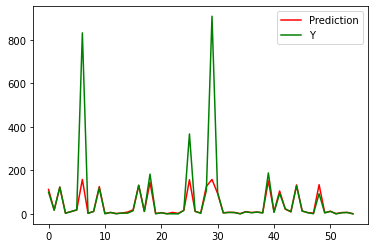

In [17]:
plt.plot(np.arange(55),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.plot(np.arange(55),y_test, c="g", label="Y")
plt.legend()
plt.show()

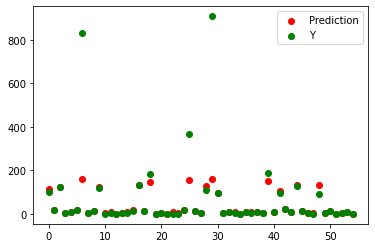

In [18]:
plt.scatter(np.arange(55),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.scatter(np.arange(55),y_test, c="g",label="Y")
plt.legend()
plt.show()

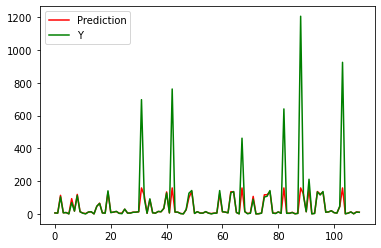

In [19]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict.reshape(trainPredict.shape[0]), c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

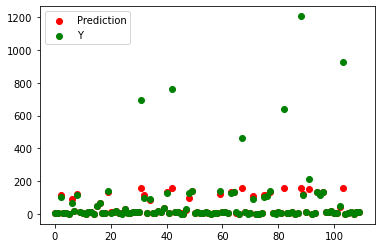

In [20]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [21]:
df = pd.read_csv('full_df.csv')

In [22]:
df

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229
...,...,...,...,...,...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01,0.007650,0.000003,1209759,676350,-0.031663
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07,0.008245,0.000003,1051403,583087,-0.024736
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01,0.008665,0.000004,877302,486018,-0.028629
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01,0.009038,0.000004,932686,508916,-0.029427


In [23]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [24]:
model = Sequential()  
model.add(LSTM(1, input_shape=(1, 10),return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [25]:
model.fit(trainX, y_train, epochs=5000, batch_size=1, verbose=2)

Epoch 1/5000
75/75 - 0s - loss: 6.6882
Epoch 2/5000
75/75 - 0s - loss: 6.5586
Epoch 3/5000
75/75 - 0s - loss: 6.4185
Epoch 4/5000
75/75 - 0s - loss: 6.2543
Epoch 5/5000
75/75 - 0s - loss: 6.0788
Epoch 6/5000
75/75 - 0s - loss: 5.9125
Epoch 7/5000
75/75 - 0s - loss: 5.7689
Epoch 8/5000
75/75 - 0s - loss: 5.6601
Epoch 9/5000
75/75 - 0s - loss: 5.5635
Epoch 10/5000
75/75 - 0s - loss: 5.4774
Epoch 11/5000
75/75 - 0s - loss: 5.3948
Epoch 12/5000
75/75 - 0s - loss: 5.3153
Epoch 13/5000
75/75 - 0s - loss: 5.2382
Epoch 14/5000
75/75 - 0s - loss: 5.1631
Epoch 15/5000
75/75 - 0s - loss: 5.0916
Epoch 16/5000
75/75 - 0s - loss: 5.0229
Epoch 17/5000
75/75 - 0s - loss: 4.9542
Epoch 18/5000
75/75 - 0s - loss: 4.8858
Epoch 19/5000
75/75 - 0s - loss: 4.8185
Epoch 20/5000
75/75 - 0s - loss: 4.7511
Epoch 21/5000
75/75 - 0s - loss: 4.6880
Epoch 22/5000
75/75 - 0s - loss: 4.6254
Epoch 23/5000
75/75 - 0s - loss: 4.5616
Epoch 24/5000
75/75 - 0s - loss: 4.4994
Epoch 25/5000
75/75 - 0s - loss: 4.4355
Epoch 26/

Epoch 204/5000
75/75 - 0s - loss: 1.0037
Epoch 205/5000
75/75 - 0s - loss: 0.9966
Epoch 206/5000
75/75 - 0s - loss: 0.9925
Epoch 207/5000
75/75 - 0s - loss: 0.9886
Epoch 208/5000
75/75 - 0s - loss: 0.9913
Epoch 209/5000
75/75 - 0s - loss: 0.9734
Epoch 210/5000
75/75 - 0s - loss: 0.9698
Epoch 211/5000
75/75 - 0s - loss: 0.9690
Epoch 212/5000
75/75 - 0s - loss: 0.9635
Epoch 213/5000
75/75 - 0s - loss: 0.9536
Epoch 214/5000
75/75 - 0s - loss: 0.9485
Epoch 215/5000
75/75 - 0s - loss: 0.9396
Epoch 216/5000
75/75 - 0s - loss: 0.9446
Epoch 217/5000
75/75 - 0s - loss: 0.9339
Epoch 218/5000
75/75 - 0s - loss: 0.9352
Epoch 219/5000
75/75 - 0s - loss: 0.9272
Epoch 220/5000
75/75 - 0s - loss: 0.9233
Epoch 221/5000
75/75 - 0s - loss: 0.9282
Epoch 222/5000
75/75 - 0s - loss: 0.9089
Epoch 223/5000
75/75 - 0s - loss: 0.9071
Epoch 224/5000
75/75 - 0s - loss: 0.9035
Epoch 225/5000
75/75 - 0s - loss: 0.8969
Epoch 226/5000
75/75 - 0s - loss: 0.8925
Epoch 227/5000
75/75 - 0s - loss: 0.8887
Epoch 228/5000
7

Epoch 404/5000
75/75 - 0s - loss: 0.4039
Epoch 405/5000
75/75 - 0s - loss: 0.3975
Epoch 406/5000
75/75 - 0s - loss: 0.3919
Epoch 407/5000
75/75 - 0s - loss: 0.3915
Epoch 408/5000
75/75 - 0s - loss: 0.3982
Epoch 409/5000
75/75 - 0s - loss: 0.3971
Epoch 410/5000
75/75 - 0s - loss: 0.4041
Epoch 411/5000
75/75 - 0s - loss: 0.3921
Epoch 412/5000
75/75 - 0s - loss: 0.3893
Epoch 413/5000
75/75 - 0s - loss: 0.3972
Epoch 414/5000
75/75 - 0s - loss: 0.3990
Epoch 415/5000
75/75 - 0s - loss: 0.3971
Epoch 416/5000
75/75 - 0s - loss: 0.3970
Epoch 417/5000
75/75 - 0s - loss: 0.3865
Epoch 418/5000
75/75 - 0s - loss: 0.3883
Epoch 419/5000
75/75 - 0s - loss: 0.3901
Epoch 420/5000
75/75 - 0s - loss: 0.3885
Epoch 421/5000
75/75 - 0s - loss: 0.3914
Epoch 422/5000
75/75 - 0s - loss: 0.3818
Epoch 423/5000
75/75 - 0s - loss: 0.3842
Epoch 424/5000
75/75 - 0s - loss: 0.3857
Epoch 425/5000
75/75 - 0s - loss: 0.4021
Epoch 426/5000
75/75 - 0s - loss: 0.3826
Epoch 427/5000
75/75 - 0s - loss: 0.3957
Epoch 428/5000
7

Epoch 604/5000
75/75 - 0s - loss: 0.3317
Epoch 605/5000
75/75 - 0s - loss: 0.3370
Epoch 606/5000
75/75 - 0s - loss: 0.3369
Epoch 607/5000
75/75 - 0s - loss: 0.3288
Epoch 608/5000
75/75 - 0s - loss: 0.3374
Epoch 609/5000
75/75 - 0s - loss: 0.3290
Epoch 610/5000
75/75 - 0s - loss: 0.3279
Epoch 611/5000
75/75 - 0s - loss: 0.3317
Epoch 612/5000
75/75 - 0s - loss: 0.3277
Epoch 613/5000
75/75 - 0s - loss: 0.3220
Epoch 614/5000
75/75 - 0s - loss: 0.3366
Epoch 615/5000
75/75 - 0s - loss: 0.3288
Epoch 616/5000
75/75 - 0s - loss: 0.3320
Epoch 617/5000
75/75 - 0s - loss: 0.3325
Epoch 618/5000
75/75 - 0s - loss: 0.3268
Epoch 619/5000
75/75 - 0s - loss: 0.3298
Epoch 620/5000
75/75 - 0s - loss: 0.3256
Epoch 621/5000
75/75 - 0s - loss: 0.3249
Epoch 622/5000
75/75 - 0s - loss: 0.3298
Epoch 623/5000
75/75 - 0s - loss: 0.3261
Epoch 624/5000
75/75 - 0s - loss: 0.3256
Epoch 625/5000
75/75 - 0s - loss: 0.3252
Epoch 626/5000
75/75 - 0s - loss: 0.3244
Epoch 627/5000
75/75 - 0s - loss: 0.3223
Epoch 628/5000
7

Epoch 804/5000
75/75 - 0s - loss: 0.3036
Epoch 805/5000
75/75 - 0s - loss: 0.3121
Epoch 806/5000
75/75 - 0s - loss: 0.3072
Epoch 807/5000
75/75 - 0s - loss: 0.3062
Epoch 808/5000
75/75 - 0s - loss: 0.3077
Epoch 809/5000
75/75 - 0s - loss: 0.3112
Epoch 810/5000
75/75 - 0s - loss: 0.3127
Epoch 811/5000
75/75 - 0s - loss: 0.3070
Epoch 812/5000
75/75 - 0s - loss: 0.3075
Epoch 813/5000
75/75 - 0s - loss: 0.3012
Epoch 814/5000
75/75 - 0s - loss: 0.3188
Epoch 815/5000
75/75 - 0s - loss: 0.3102
Epoch 816/5000
75/75 - 0s - loss: 0.3072
Epoch 817/5000
75/75 - 0s - loss: 0.3039
Epoch 818/5000
75/75 - 0s - loss: 0.3015
Epoch 819/5000
75/75 - 0s - loss: 0.3149
Epoch 820/5000
75/75 - 0s - loss: 0.3083
Epoch 821/5000
75/75 - 0s - loss: 0.3114
Epoch 822/5000
75/75 - 0s - loss: 0.3099
Epoch 823/5000
75/75 - 0s - loss: 0.3079
Epoch 824/5000
75/75 - 0s - loss: 0.3160
Epoch 825/5000
75/75 - 0s - loss: 0.3054
Epoch 826/5000
75/75 - 0s - loss: 0.3108
Epoch 827/5000
75/75 - 0s - loss: 0.2945
Epoch 828/5000
7

Epoch 1004/5000
75/75 - 0s - loss: 0.2916
Epoch 1005/5000
75/75 - 0s - loss: 0.2927
Epoch 1006/5000
75/75 - 0s - loss: 0.2875
Epoch 1007/5000
75/75 - 0s - loss: 0.2991
Epoch 1008/5000
75/75 - 0s - loss: 0.3001
Epoch 1009/5000
75/75 - 0s - loss: 0.2916
Epoch 1010/5000
75/75 - 0s - loss: 0.2866
Epoch 1011/5000
75/75 - 0s - loss: 0.2929
Epoch 1012/5000
75/75 - 0s - loss: 0.2917
Epoch 1013/5000
75/75 - 0s - loss: 0.2894
Epoch 1014/5000
75/75 - 0s - loss: 0.2942
Epoch 1015/5000
75/75 - 0s - loss: 0.2974
Epoch 1016/5000
75/75 - 0s - loss: 0.2917
Epoch 1017/5000
75/75 - 0s - loss: 0.2986
Epoch 1018/5000
75/75 - 0s - loss: 0.2926
Epoch 1019/5000
75/75 - 0s - loss: 0.2929
Epoch 1020/5000
75/75 - 0s - loss: 0.2912
Epoch 1021/5000
75/75 - 0s - loss: 0.2987
Epoch 1022/5000
75/75 - 0s - loss: 0.2935
Epoch 1023/5000
75/75 - 0s - loss: 0.2951
Epoch 1024/5000
75/75 - 0s - loss: 0.2938
Epoch 1025/5000
75/75 - 0s - loss: 0.2900
Epoch 1026/5000
75/75 - 0s - loss: 0.2980
Epoch 1027/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2895
Epoch 1200/5000
75/75 - 0s - loss: 0.2873
Epoch 1201/5000
75/75 - 0s - loss: 0.2866
Epoch 1202/5000
75/75 - 0s - loss: 0.2881
Epoch 1203/5000
75/75 - 0s - loss: 0.2950
Epoch 1204/5000
75/75 - 0s - loss: 0.2846
Epoch 1205/5000
75/75 - 0s - loss: 0.2868
Epoch 1206/5000
75/75 - 0s - loss: 0.3008
Epoch 1207/5000
75/75 - 0s - loss: 0.2958
Epoch 1208/5000
75/75 - 0s - loss: 0.2866
Epoch 1209/5000
75/75 - 0s - loss: 0.2993
Epoch 1210/5000
75/75 - 0s - loss: 0.2872
Epoch 1211/5000
75/75 - 0s - loss: 0.2884
Epoch 1212/5000
75/75 - 0s - loss: 0.2833
Epoch 1213/5000
75/75 - 0s - loss: 0.2901
Epoch 1214/5000
75/75 - 0s - loss: 0.2891
Epoch 1215/5000
75/75 - 0s - loss: 0.2848
Epoch 1216/5000
75/75 - 0s - loss: 0.2814
Epoch 1217/5000
75/75 - 0s - loss: 0.2879
Epoch 1218/5000
75/75 - 0s - loss: 0.2869
Epoch 1219/5000
75/75 - 0s - loss: 0.2878
Epoch 1220/5000
75/75 - 0s - loss: 0.2887
Epoch 1221/5000
75/75 - 0s - loss: 0.2918
Epoch 1222/5000
75/75 - 0s - loss: 0.2922
Epoch 12

Epoch 1395/5000
75/75 - 0s - loss: 0.2895
Epoch 1396/5000
75/75 - 0s - loss: 0.2814
Epoch 1397/5000
75/75 - 0s - loss: 0.2867
Epoch 1398/5000
75/75 - 0s - loss: 0.2819
Epoch 1399/5000
75/75 - 0s - loss: 0.2813
Epoch 1400/5000
75/75 - 0s - loss: 0.3015
Epoch 1401/5000
75/75 - 0s - loss: 0.2839
Epoch 1402/5000
75/75 - 0s - loss: 0.2850
Epoch 1403/5000
75/75 - 0s - loss: 0.2854
Epoch 1404/5000
75/75 - 0s - loss: 0.2787
Epoch 1405/5000
75/75 - 0s - loss: 0.2878
Epoch 1406/5000
75/75 - 0s - loss: 0.2858
Epoch 1407/5000
75/75 - 0s - loss: 0.2837
Epoch 1408/5000
75/75 - 0s - loss: 0.2799
Epoch 1409/5000
75/75 - 0s - loss: 0.2843
Epoch 1410/5000
75/75 - 0s - loss: 0.2902
Epoch 1411/5000
75/75 - 0s - loss: 0.2832
Epoch 1412/5000
75/75 - 0s - loss: 0.2831
Epoch 1413/5000
75/75 - 0s - loss: 0.2923
Epoch 1414/5000
75/75 - 0s - loss: 0.2818
Epoch 1415/5000
75/75 - 0s - loss: 0.2834
Epoch 1416/5000
75/75 - 0s - loss: 0.2931
Epoch 1417/5000
75/75 - 0s - loss: 0.2911
Epoch 1418/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2791
Epoch 1591/5000
75/75 - 0s - loss: 0.2738
Epoch 1592/5000
75/75 - 0s - loss: 0.2844
Epoch 1593/5000
75/75 - 0s - loss: 0.2741
Epoch 1594/5000
75/75 - 0s - loss: 0.2822
Epoch 1595/5000
75/75 - 0s - loss: 0.2750
Epoch 1596/5000
75/75 - 0s - loss: 0.2730
Epoch 1597/5000
75/75 - 0s - loss: 0.2799
Epoch 1598/5000
75/75 - 0s - loss: 0.2792
Epoch 1599/5000
75/75 - 0s - loss: 0.2776
Epoch 1600/5000
75/75 - 0s - loss: 0.2788
Epoch 1601/5000
75/75 - 0s - loss: 0.2902
Epoch 1602/5000
75/75 - 0s - loss: 0.2800
Epoch 1603/5000
75/75 - 0s - loss: 0.2829
Epoch 1604/5000
75/75 - 0s - loss: 0.2756
Epoch 1605/5000
75/75 - 0s - loss: 0.2770
Epoch 1606/5000
75/75 - 0s - loss: 0.2861
Epoch 1607/5000
75/75 - 0s - loss: 0.2772
Epoch 1608/5000
75/75 - 0s - loss: 0.2815
Epoch 1609/5000
75/75 - 0s - loss: 0.2764
Epoch 1610/5000
75/75 - 0s - loss: 0.2862
Epoch 1611/5000
75/75 - 0s - loss: 0.2999
Epoch 1612/5000
75/75 - 0s - loss: 0.2830
Epoch 1613/5000
75/75 - 0s - loss: 0.2797
Epoch 16

Epoch 1786/5000
75/75 - 0s - loss: 0.2814
Epoch 1787/5000
75/75 - 0s - loss: 0.2722
Epoch 1788/5000
75/75 - 0s - loss: 0.2779
Epoch 1789/5000
75/75 - 0s - loss: 0.2738
Epoch 1790/5000
75/75 - 0s - loss: 0.2814
Epoch 1791/5000
75/75 - 0s - loss: 0.2753
Epoch 1792/5000
75/75 - 0s - loss: 0.2740
Epoch 1793/5000
75/75 - 0s - loss: 0.2830
Epoch 1794/5000
75/75 - 0s - loss: 0.2730
Epoch 1795/5000
75/75 - 0s - loss: 0.2778
Epoch 1796/5000
75/75 - 0s - loss: 0.2770
Epoch 1797/5000
75/75 - 0s - loss: 0.2731
Epoch 1798/5000
75/75 - 0s - loss: 0.2847
Epoch 1799/5000
75/75 - 0s - loss: 0.2726
Epoch 1800/5000
75/75 - 0s - loss: 0.2756
Epoch 1801/5000
75/75 - 0s - loss: 0.2811
Epoch 1802/5000
75/75 - 0s - loss: 0.2836
Epoch 1803/5000
75/75 - 0s - loss: 0.2731
Epoch 1804/5000
75/75 - 0s - loss: 0.2791
Epoch 1805/5000
75/75 - 0s - loss: 0.2774
Epoch 1806/5000
75/75 - 0s - loss: 0.2864
Epoch 1807/5000
75/75 - 0s - loss: 0.2692
Epoch 1808/5000
75/75 - 0s - loss: 0.2740
Epoch 1809/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2724
Epoch 1982/5000
75/75 - 0s - loss: 0.2746
Epoch 1983/5000
75/75 - 0s - loss: 0.2724
Epoch 1984/5000
75/75 - 0s - loss: 0.2694
Epoch 1985/5000
75/75 - 0s - loss: 0.2804
Epoch 1986/5000
75/75 - 0s - loss: 0.2701
Epoch 1987/5000
75/75 - 0s - loss: 0.2754
Epoch 1988/5000
75/75 - 0s - loss: 0.2749
Epoch 1989/5000
75/75 - 0s - loss: 0.2793
Epoch 1990/5000
75/75 - 0s - loss: 0.2643
Epoch 1991/5000
75/75 - 0s - loss: 0.2796
Epoch 1992/5000
75/75 - 0s - loss: 0.2725
Epoch 1993/5000
75/75 - 0s - loss: 0.2767
Epoch 1994/5000
75/75 - 0s - loss: 0.2750
Epoch 1995/5000
75/75 - 0s - loss: 0.2687
Epoch 1996/5000
75/75 - 0s - loss: 0.2686
Epoch 1997/5000
75/75 - 0s - loss: 0.2689
Epoch 1998/5000
75/75 - 0s - loss: 0.2685
Epoch 1999/5000
75/75 - 0s - loss: 0.2769
Epoch 2000/5000
75/75 - 0s - loss: 0.2803
Epoch 2001/5000
75/75 - 0s - loss: 0.2715
Epoch 2002/5000
75/75 - 0s - loss: 0.2786
Epoch 2003/5000
75/75 - 0s - loss: 0.2770
Epoch 2004/5000
75/75 - 0s - loss: 0.2700
Epoch 20

Epoch 2177/5000
75/75 - 0s - loss: 0.2682
Epoch 2178/5000
75/75 - 0s - loss: 0.2738
Epoch 2179/5000
75/75 - 0s - loss: 0.2678
Epoch 2180/5000
75/75 - 0s - loss: 0.2778
Epoch 2181/5000
75/75 - 0s - loss: 0.2697
Epoch 2182/5000
75/75 - 0s - loss: 0.2805
Epoch 2183/5000
75/75 - 0s - loss: 0.2745
Epoch 2184/5000
75/75 - 0s - loss: 0.2721
Epoch 2185/5000
75/75 - 0s - loss: 0.2782
Epoch 2186/5000
75/75 - 0s - loss: 0.2680
Epoch 2187/5000
75/75 - 0s - loss: 0.2677
Epoch 2188/5000
75/75 - 0s - loss: 0.2687
Epoch 2189/5000
75/75 - 0s - loss: 0.2843
Epoch 2190/5000
75/75 - 0s - loss: 0.2731
Epoch 2191/5000
75/75 - 0s - loss: 0.2654
Epoch 2192/5000
75/75 - 0s - loss: 0.2659
Epoch 2193/5000
75/75 - 0s - loss: 0.2695
Epoch 2194/5000
75/75 - 0s - loss: 0.2706
Epoch 2195/5000
75/75 - 0s - loss: 0.2689
Epoch 2196/5000
75/75 - 0s - loss: 0.2678
Epoch 2197/5000
75/75 - 0s - loss: 0.2746
Epoch 2198/5000
75/75 - 0s - loss: 0.2679
Epoch 2199/5000
75/75 - 0s - loss: 0.2716
Epoch 2200/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2719
Epoch 2373/5000
75/75 - 0s - loss: 0.2673
Epoch 2374/5000
75/75 - 0s - loss: 0.2654
Epoch 2375/5000
75/75 - 0s - loss: 0.2787
Epoch 2376/5000
75/75 - 0s - loss: 0.2623
Epoch 2377/5000
75/75 - 0s - loss: 0.2723
Epoch 2378/5000
75/75 - 0s - loss: 0.2621
Epoch 2379/5000
75/75 - 0s - loss: 0.2685
Epoch 2380/5000
75/75 - 0s - loss: 0.2730
Epoch 2381/5000
75/75 - 0s - loss: 0.2674
Epoch 2382/5000
75/75 - 0s - loss: 0.2759
Epoch 2383/5000
75/75 - 0s - loss: 0.2638
Epoch 2384/5000
75/75 - 0s - loss: 0.2720
Epoch 2385/5000
75/75 - 0s - loss: 0.2687
Epoch 2386/5000
75/75 - 0s - loss: 0.2665
Epoch 2387/5000
75/75 - 0s - loss: 0.2633
Epoch 2388/5000
75/75 - 0s - loss: 0.2667
Epoch 2389/5000
75/75 - 0s - loss: 0.2666
Epoch 2390/5000
75/75 - 0s - loss: 0.2679
Epoch 2391/5000
75/75 - 0s - loss: 0.2679
Epoch 2392/5000
75/75 - 0s - loss: 0.2691
Epoch 2393/5000
75/75 - 0s - loss: 0.2643
Epoch 2394/5000
75/75 - 0s - loss: 0.2671
Epoch 2395/5000
75/75 - 0s - loss: 0.2673
Epoch 23

Epoch 2568/5000
75/75 - 0s - loss: 0.2625
Epoch 2569/5000
75/75 - 0s - loss: 0.2766
Epoch 2570/5000
75/75 - 0s - loss: 0.2602
Epoch 2571/5000
75/75 - 0s - loss: 0.2668
Epoch 2572/5000
75/75 - 0s - loss: 0.2596
Epoch 2573/5000
75/75 - 0s - loss: 0.2664
Epoch 2574/5000
75/75 - 0s - loss: 0.2723
Epoch 2575/5000
75/75 - 0s - loss: 0.2648
Epoch 2576/5000
75/75 - 0s - loss: 0.2619
Epoch 2577/5000
75/75 - 0s - loss: 0.2648
Epoch 2578/5000
75/75 - 0s - loss: 0.2641
Epoch 2579/5000
75/75 - 0s - loss: 0.2637
Epoch 2580/5000
75/75 - 0s - loss: 0.2882
Epoch 2581/5000
75/75 - 0s - loss: 0.2679
Epoch 2582/5000
75/75 - 0s - loss: 0.2599
Epoch 2583/5000
75/75 - 0s - loss: 0.2585
Epoch 2584/5000
75/75 - 0s - loss: 0.2580
Epoch 2585/5000
75/75 - 0s - loss: 0.2647
Epoch 2586/5000
75/75 - 0s - loss: 0.2578
Epoch 2587/5000
75/75 - 0s - loss: 0.2677
Epoch 2588/5000
75/75 - 0s - loss: 0.2599
Epoch 2589/5000
75/75 - 0s - loss: 0.2604
Epoch 2590/5000
75/75 - 0s - loss: 0.2629
Epoch 2591/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2618
Epoch 2764/5000
75/75 - 0s - loss: 0.2640
Epoch 2765/5000
75/75 - 0s - loss: 0.2581
Epoch 2766/5000
75/75 - 0s - loss: 0.2643
Epoch 2767/5000
75/75 - 0s - loss: 0.2619
Epoch 2768/5000
75/75 - 0s - loss: 0.2565
Epoch 2769/5000
75/75 - 0s - loss: 0.2553
Epoch 2770/5000
75/75 - 0s - loss: 0.2729
Epoch 2771/5000
75/75 - 0s - loss: 0.2631
Epoch 2772/5000
75/75 - 0s - loss: 0.2603
Epoch 2773/5000
75/75 - 0s - loss: 0.2579
Epoch 2774/5000
75/75 - 0s - loss: 0.2700
Epoch 2775/5000
75/75 - 0s - loss: 0.2550
Epoch 2776/5000
75/75 - 0s - loss: 0.2763
Epoch 2777/5000
75/75 - 0s - loss: 0.2683
Epoch 2778/5000
75/75 - 0s - loss: 0.2583
Epoch 2779/5000
75/75 - 0s - loss: 0.2644
Epoch 2780/5000
75/75 - 0s - loss: 0.2480
Epoch 2781/5000
75/75 - 0s - loss: 0.2560
Epoch 2782/5000
75/75 - 0s - loss: 0.2711
Epoch 2783/5000
75/75 - 0s - loss: 0.2565
Epoch 2784/5000
75/75 - 0s - loss: 0.2511
Epoch 2785/5000
75/75 - 0s - loss: 0.2529
Epoch 2786/5000
75/75 - 0s - loss: 0.2549
Epoch 27

Epoch 2959/5000
75/75 - 0s - loss: 0.2565
Epoch 2960/5000
75/75 - 0s - loss: 0.2593
Epoch 2961/5000
75/75 - 0s - loss: 0.2626
Epoch 2962/5000
75/75 - 0s - loss: 0.2521
Epoch 2963/5000
75/75 - 0s - loss: 0.2581
Epoch 2964/5000
75/75 - 0s - loss: 0.2595
Epoch 2965/5000
75/75 - 0s - loss: 0.2526
Epoch 2966/5000
75/75 - 0s - loss: 0.2635
Epoch 2967/5000
75/75 - 0s - loss: 0.2618
Epoch 2968/5000
75/75 - 0s - loss: 0.2609
Epoch 2969/5000
75/75 - 0s - loss: 0.2689
Epoch 2970/5000
75/75 - 0s - loss: 0.2592
Epoch 2971/5000
75/75 - 0s - loss: 0.2609
Epoch 2972/5000
75/75 - 0s - loss: 0.2536
Epoch 2973/5000
75/75 - 0s - loss: 0.2565
Epoch 2974/5000
75/75 - 0s - loss: 0.2575
Epoch 2975/5000
75/75 - 0s - loss: 0.2517
Epoch 2976/5000
75/75 - 0s - loss: 0.2553
Epoch 2977/5000
75/75 - 0s - loss: 0.2513
Epoch 2978/5000
75/75 - 0s - loss: 0.2659
Epoch 2979/5000
75/75 - 0s - loss: 0.2662
Epoch 2980/5000
75/75 - 0s - loss: 0.2630
Epoch 2981/5000
75/75 - 0s - loss: 0.2611
Epoch 2982/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2471
Epoch 3155/5000
75/75 - 0s - loss: 0.2512
Epoch 3156/5000
75/75 - 0s - loss: 0.2646
Epoch 3157/5000
75/75 - 0s - loss: 0.2519
Epoch 3158/5000
75/75 - 0s - loss: 0.2431
Epoch 3159/5000
75/75 - 0s - loss: 0.2558
Epoch 3160/5000
75/75 - 0s - loss: 0.2612
Epoch 3161/5000
75/75 - 0s - loss: 0.2583
Epoch 3162/5000
75/75 - 0s - loss: 0.2530
Epoch 3163/5000
75/75 - 0s - loss: 0.2567
Epoch 3164/5000
75/75 - 0s - loss: 0.2531
Epoch 3165/5000
75/75 - 0s - loss: 0.2553
Epoch 3166/5000
75/75 - 0s - loss: 0.2571
Epoch 3167/5000
75/75 - 0s - loss: 0.2622
Epoch 3168/5000
75/75 - 0s - loss: 0.2542
Epoch 3169/5000
75/75 - 0s - loss: 0.2592
Epoch 3170/5000
75/75 - 0s - loss: 0.2570
Epoch 3171/5000
75/75 - 0s - loss: 0.2494
Epoch 3172/5000
75/75 - 0s - loss: 0.2484
Epoch 3173/5000
75/75 - 0s - loss: 0.2587
Epoch 3174/5000
75/75 - 0s - loss: 0.2516
Epoch 3175/5000
75/75 - 0s - loss: 0.2519
Epoch 3176/5000
75/75 - 0s - loss: 0.2441
Epoch 3177/5000
75/75 - 0s - loss: 0.2495
Epoch 31

Epoch 3350/5000
75/75 - 0s - loss: 0.2514
Epoch 3351/5000
75/75 - 0s - loss: 0.2528
Epoch 3352/5000
75/75 - 0s - loss: 0.2459
Epoch 3353/5000
75/75 - 0s - loss: 0.2516
Epoch 3354/5000
75/75 - 0s - loss: 0.2419
Epoch 3355/5000
75/75 - 0s - loss: 0.2458
Epoch 3356/5000
75/75 - 0s - loss: 0.2505
Epoch 3357/5000
75/75 - 0s - loss: 0.2425
Epoch 3358/5000
75/75 - 0s - loss: 0.2461
Epoch 3359/5000
75/75 - 0s - loss: 0.2509
Epoch 3360/5000
75/75 - 0s - loss: 0.2416
Epoch 3361/5000
75/75 - 0s - loss: 0.2459
Epoch 3362/5000
75/75 - 0s - loss: 0.2455
Epoch 3363/5000
75/75 - 0s - loss: 0.2467
Epoch 3364/5000
75/75 - 0s - loss: 0.2425
Epoch 3365/5000
75/75 - 0s - loss: 0.2529
Epoch 3366/5000
75/75 - 0s - loss: 0.2532
Epoch 3367/5000
75/75 - 0s - loss: 0.2446
Epoch 3368/5000
75/75 - 0s - loss: 0.2499
Epoch 3369/5000
75/75 - 0s - loss: 0.2466
Epoch 3370/5000
75/75 - 0s - loss: 0.2497
Epoch 3371/5000
75/75 - 0s - loss: 0.2492
Epoch 3372/5000
75/75 - 0s - loss: 0.2529
Epoch 3373/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2412
Epoch 3546/5000
75/75 - 0s - loss: 0.2405
Epoch 3547/5000
75/75 - 0s - loss: 0.2394
Epoch 3548/5000
75/75 - 0s - loss: 0.2530
Epoch 3549/5000
75/75 - 0s - loss: 0.2433
Epoch 3550/5000
75/75 - 0s - loss: 0.2482
Epoch 3551/5000
75/75 - 0s - loss: 0.2490
Epoch 3552/5000
75/75 - 0s - loss: 0.2427
Epoch 3553/5000
75/75 - 0s - loss: 0.2380
Epoch 3554/5000
75/75 - 0s - loss: 0.2382
Epoch 3555/5000
75/75 - 0s - loss: 0.2487
Epoch 3556/5000
75/75 - 0s - loss: 0.2447
Epoch 3557/5000
75/75 - 0s - loss: 0.2508
Epoch 3558/5000
75/75 - 0s - loss: 0.2410
Epoch 3559/5000
75/75 - 0s - loss: 0.2509
Epoch 3560/5000
75/75 - 0s - loss: 0.2441
Epoch 3561/5000
75/75 - 0s - loss: 0.2366
Epoch 3562/5000
75/75 - 0s - loss: 0.2378
Epoch 3563/5000
75/75 - 0s - loss: 0.2411
Epoch 3564/5000
75/75 - 0s - loss: 0.2422
Epoch 3565/5000
75/75 - 0s - loss: 0.2468
Epoch 3566/5000
75/75 - 0s - loss: 0.2370
Epoch 3567/5000
75/75 - 0s - loss: 0.2583
Epoch 3568/5000
75/75 - 0s - loss: 0.2359
Epoch 35

Epoch 3741/5000
75/75 - 0s - loss: 0.2382
Epoch 3742/5000
75/75 - 0s - loss: 0.2376
Epoch 3743/5000
75/75 - 0s - loss: 0.2389
Epoch 3744/5000
75/75 - 0s - loss: 0.2343
Epoch 3745/5000
75/75 - 0s - loss: 0.2391
Epoch 3746/5000
75/75 - 0s - loss: 0.2447
Epoch 3747/5000
75/75 - 0s - loss: 0.2407
Epoch 3748/5000
75/75 - 0s - loss: 0.2422
Epoch 3749/5000
75/75 - 0s - loss: 0.2385
Epoch 3750/5000
75/75 - 0s - loss: 0.2305
Epoch 3751/5000
75/75 - 0s - loss: 0.2354
Epoch 3752/5000
75/75 - 0s - loss: 0.2372
Epoch 3753/5000
75/75 - 0s - loss: 0.2361
Epoch 3754/5000
75/75 - 0s - loss: 0.2431
Epoch 3755/5000
75/75 - 0s - loss: 0.2341
Epoch 3756/5000
75/75 - 0s - loss: 0.2382
Epoch 3757/5000
75/75 - 0s - loss: 0.2373
Epoch 3758/5000
75/75 - 0s - loss: 0.2420
Epoch 3759/5000
75/75 - 0s - loss: 0.2353
Epoch 3760/5000
75/75 - 0s - loss: 0.2382
Epoch 3761/5000
75/75 - 0s - loss: 0.2341
Epoch 3762/5000
75/75 - 0s - loss: 0.2427
Epoch 3763/5000
75/75 - 0s - loss: 0.2465
Epoch 3764/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2262
Epoch 3937/5000
75/75 - 0s - loss: 0.2314
Epoch 3938/5000
75/75 - 0s - loss: 0.2253
Epoch 3939/5000
75/75 - 0s - loss: 0.2327
Epoch 3940/5000
75/75 - 0s - loss: 0.2297
Epoch 3941/5000
75/75 - 0s - loss: 0.2269
Epoch 3942/5000
75/75 - 0s - loss: 0.2294
Epoch 3943/5000
75/75 - 0s - loss: 0.2301
Epoch 3944/5000
75/75 - 0s - loss: 0.2285
Epoch 3945/5000
75/75 - 0s - loss: 0.2310
Epoch 3946/5000
75/75 - 0s - loss: 0.2311
Epoch 3947/5000
75/75 - 0s - loss: 0.2272
Epoch 3948/5000
75/75 - 0s - loss: 0.2257
Epoch 3949/5000
75/75 - 0s - loss: 0.2296
Epoch 3950/5000
75/75 - 0s - loss: 0.2397
Epoch 3951/5000
75/75 - 0s - loss: 0.2318
Epoch 3952/5000
75/75 - 0s - loss: 0.2324
Epoch 3953/5000
75/75 - 0s - loss: 0.2273
Epoch 3954/5000
75/75 - 0s - loss: 0.2287
Epoch 3955/5000
75/75 - 0s - loss: 0.2312
Epoch 3956/5000
75/75 - 0s - loss: 0.2330
Epoch 3957/5000
75/75 - 0s - loss: 0.2288
Epoch 3958/5000
75/75 - 0s - loss: 0.2296
Epoch 3959/5000
75/75 - 0s - loss: 0.2330
Epoch 39

Epoch 4132/5000
75/75 - 0s - loss: 0.2206
Epoch 4133/5000
75/75 - 0s - loss: 0.2309
Epoch 4134/5000
75/75 - 0s - loss: 0.2304
Epoch 4135/5000
75/75 - 0s - loss: 0.2219
Epoch 4136/5000
75/75 - 0s - loss: 0.2304
Epoch 4137/5000
75/75 - 0s - loss: 0.2201
Epoch 4138/5000
75/75 - 0s - loss: 0.2193
Epoch 4139/5000
75/75 - 0s - loss: 0.2258
Epoch 4140/5000
75/75 - 0s - loss: 0.2240
Epoch 4141/5000
75/75 - 0s - loss: 0.2278
Epoch 4142/5000
75/75 - 0s - loss: 0.2247
Epoch 4143/5000
75/75 - 0s - loss: 0.2193
Epoch 4144/5000
75/75 - 0s - loss: 0.2229
Epoch 4145/5000
75/75 - 0s - loss: 0.2258
Epoch 4146/5000
75/75 - 0s - loss: 0.2235
Epoch 4147/5000
75/75 - 0s - loss: 0.2245
Epoch 4148/5000
75/75 - 0s - loss: 0.2191
Epoch 4149/5000
75/75 - 0s - loss: 0.2321
Epoch 4150/5000
75/75 - 0s - loss: 0.2215
Epoch 4151/5000
75/75 - 0s - loss: 0.2295
Epoch 4152/5000
75/75 - 0s - loss: 0.2254
Epoch 4153/5000
75/75 - 0s - loss: 0.2260
Epoch 4154/5000
75/75 - 0s - loss: 0.2247
Epoch 4155/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2280
Epoch 4328/5000
75/75 - 0s - loss: 0.2139
Epoch 4329/5000
75/75 - 0s - loss: 0.2248
Epoch 4330/5000
75/75 - 0s - loss: 0.2187
Epoch 4331/5000
75/75 - 0s - loss: 0.2190
Epoch 4332/5000
75/75 - 0s - loss: 0.2162
Epoch 4333/5000
75/75 - 0s - loss: 0.2140
Epoch 4334/5000
75/75 - 0s - loss: 0.2150
Epoch 4335/5000
75/75 - 0s - loss: 0.2364
Epoch 4336/5000
75/75 - 0s - loss: 0.2211
Epoch 4337/5000
75/75 - 0s - loss: 0.2214
Epoch 4338/5000
75/75 - 0s - loss: 0.2295
Epoch 4339/5000
75/75 - 0s - loss: 0.2188
Epoch 4340/5000
75/75 - 0s - loss: 0.2181
Epoch 4341/5000
75/75 - 0s - loss: 0.2166
Epoch 4342/5000
75/75 - 0s - loss: 0.2211
Epoch 4343/5000
75/75 - 0s - loss: 0.2188
Epoch 4344/5000
75/75 - 0s - loss: 0.2297
Epoch 4345/5000
75/75 - 0s - loss: 0.2226
Epoch 4346/5000
75/75 - 0s - loss: 0.2196
Epoch 4347/5000
75/75 - 0s - loss: 0.2245
Epoch 4348/5000
75/75 - 0s - loss: 0.2212
Epoch 4349/5000
75/75 - 0s - loss: 0.2137
Epoch 4350/5000
75/75 - 0s - loss: 0.2194
Epoch 43

Epoch 4523/5000
75/75 - 0s - loss: 0.2126
Epoch 4524/5000
75/75 - 0s - loss: 0.2159
Epoch 4525/5000
75/75 - 0s - loss: 0.2046
Epoch 4526/5000
75/75 - 0s - loss: 0.2140
Epoch 4527/5000
75/75 - 0s - loss: 0.2092
Epoch 4528/5000
75/75 - 0s - loss: 0.2188
Epoch 4529/5000
75/75 - 0s - loss: 0.2146
Epoch 4530/5000
75/75 - 0s - loss: 0.2129
Epoch 4531/5000
75/75 - 0s - loss: 0.2212
Epoch 4532/5000
75/75 - 0s - loss: 0.2153
Epoch 4533/5000
75/75 - 0s - loss: 0.2175
Epoch 4534/5000
75/75 - 0s - loss: 0.2174
Epoch 4535/5000
75/75 - 0s - loss: 0.2112
Epoch 4536/5000
75/75 - 0s - loss: 0.2181
Epoch 4537/5000
75/75 - 0s - loss: 0.2188
Epoch 4538/5000
75/75 - 0s - loss: 0.2087
Epoch 4539/5000
75/75 - 0s - loss: 0.2179
Epoch 4540/5000
75/75 - 0s - loss: 0.2122
Epoch 4541/5000
75/75 - 0s - loss: 0.2094
Epoch 4542/5000
75/75 - 0s - loss: 0.2112
Epoch 4543/5000
75/75 - 0s - loss: 0.2093
Epoch 4544/5000
75/75 - 0s - loss: 0.2079
Epoch 4545/5000
75/75 - 0s - loss: 0.2200
Epoch 4546/5000
75/75 - 0s - loss:

75/75 - 0s - loss: 0.2071
Epoch 4719/5000
75/75 - 0s - loss: 0.2105
Epoch 4720/5000
75/75 - 0s - loss: 0.2073
Epoch 4721/5000
75/75 - 0s - loss: 0.2061
Epoch 4722/5000
75/75 - 0s - loss: 0.2063
Epoch 4723/5000
75/75 - 0s - loss: 0.2032
Epoch 4724/5000
75/75 - 0s - loss: 0.2167
Epoch 4725/5000
75/75 - 0s - loss: 0.2072
Epoch 4726/5000
75/75 - 0s - loss: 0.2098
Epoch 4727/5000
75/75 - 0s - loss: 0.2091
Epoch 4728/5000
75/75 - 0s - loss: 0.2060
Epoch 4729/5000
75/75 - 0s - loss: 0.2091
Epoch 4730/5000
75/75 - 0s - loss: 0.2100
Epoch 4731/5000
75/75 - 0s - loss: 0.2208
Epoch 4732/5000
75/75 - 0s - loss: 0.2055
Epoch 4733/5000
75/75 - 0s - loss: 0.2065
Epoch 4734/5000
75/75 - 0s - loss: 0.2123
Epoch 4735/5000
75/75 - 0s - loss: 0.2064
Epoch 4736/5000
75/75 - 0s - loss: 0.2063
Epoch 4737/5000
75/75 - 0s - loss: 0.2181
Epoch 4738/5000
75/75 - 0s - loss: 0.2057
Epoch 4739/5000
75/75 - 0s - loss: 0.2147
Epoch 4740/5000
75/75 - 0s - loss: 0.2073
Epoch 4741/5000
75/75 - 0s - loss: 0.2069
Epoch 47

Epoch 4914/5000
75/75 - 0s - loss: 0.2133
Epoch 4915/5000
75/75 - 0s - loss: 0.2093
Epoch 4916/5000
75/75 - 0s - loss: 0.2114
Epoch 4917/5000
75/75 - 0s - loss: 0.2095
Epoch 4918/5000
75/75 - 0s - loss: 0.2096
Epoch 4919/5000
75/75 - 0s - loss: 0.2036
Epoch 4920/5000
75/75 - 0s - loss: 0.2047
Epoch 4921/5000
75/75 - 0s - loss: 0.2034
Epoch 4922/5000
75/75 - 0s - loss: 0.2083
Epoch 4923/5000
75/75 - 0s - loss: 0.2154
Epoch 4924/5000
75/75 - 0s - loss: 0.2098
Epoch 4925/5000
75/75 - 0s - loss: 0.2079
Epoch 4926/5000
75/75 - 0s - loss: 0.2143
Epoch 4927/5000
75/75 - 0s - loss: 0.1987
Epoch 4928/5000
75/75 - 0s - loss: 0.2073
Epoch 4929/5000
75/75 - 0s - loss: 0.2071
Epoch 4930/5000
75/75 - 0s - loss: 0.2108
Epoch 4931/5000
75/75 - 0s - loss: 0.2099
Epoch 4932/5000
75/75 - 0s - loss: 0.2053
Epoch 4933/5000
75/75 - 0s - loss: 0.2019
Epoch 4934/5000
75/75 - 0s - loss: 0.2111
Epoch 4935/5000
75/75 - 0s - loss: 0.2070
Epoch 4936/5000
75/75 - 0s - loss: 0.2071
Epoch 4937/5000
75/75 - 0s - loss:

In [39]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test.values, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.37 RMSE
Test Score: 0.65 RMSE
Train Score: 0.19 MAE
Test Score: 0.41 MAE
Train Score: 0.09 MAPE
Test Score: 0.25 MAPE


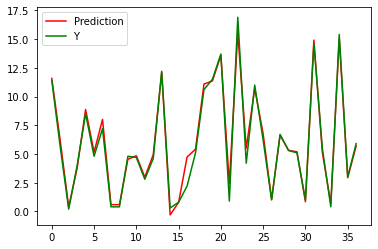

In [27]:
plt.plot(np.arange(testPredict.shape[0]),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.plot(np.arange(testPredict.shape[0]),y_test, c="g", label="Y")
plt.legend()
plt.show()

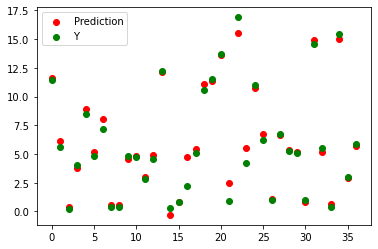

In [28]:
plt.scatter(np.arange(testPredict.shape[0]),testPredict.reshape(testPredict.shape[0]), c="r",label="Prediction")
plt.scatter(np.arange(testPredict.shape[0]),y_test, c="g",label="Y")
plt.legend()
plt.show()

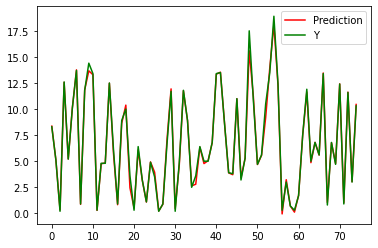

In [29]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict.reshape(trainPredict.shape[0]), c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

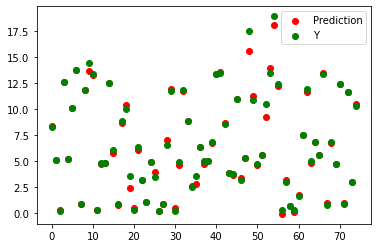

In [30]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()